Question 1: General Knowledge
A. Both Molecular Dynamics (MD) and Monte Carlo (MC) simulations can be used to compute thermodynamic quantities and in principle should produce the same answer. Explain the differences between these methods. 3pts
B. Describe the critical choices we must make when applying gradient descent minimization to a potential energy surface, such as learning rate, initialization, and convergence criteria. Explain how each choice can influence the efficiency and outcome of finding a minimum energy configuration. 4pts
C. Consider a probabilistic sampling approach that allows occasional acceptance of higher-energy configurations to explore the potential energy surface. Describe how choices like temperature, move proposal mechanisms, and sampling length affect this process. What impact do these choices have on the efficiency of finding a global minimum? 4pts

Q1:
    A. There are three key differences between Molecular Dynamics (MD) and Monte Carlo (MC) Simulations: 1) principle of simulation; 2) time dependency; 3) efficiency in sampling. For 1) MD simulates atomic motion through solving Newton's equation of motion—producing deterministic trajectories dervied from potential energy. This very much counters MC's probabilisitic sampling, by acceptance criterion (e.g. Metropolis criterion). For 2) MC does not require time evolution; instead, it exploits phase space to approicmate thermogynamic properties. Whereas MD tracks temporal evolution of the system, requiring time-dependent properties (e.g. diffusion coefficients). For 3) MC allows for more flexible sampling strategies in optimizing sampling through its propetry of jumping between configurations instead of following a continuous trajectory. MD is limited in timestep size, which must be small to capture atomic motions, therefore contributing to a more slower exploration of phase space.
    Ultimately, it is the difference in applicabaility and efficiency depending on properties and time scales of interest.
    
    B. There are three critical choices in Gradient Descent—of a potenital energy surface—which are 1) learning rate, 2) intialization, 3) convergence criteria. With the learning rate, if it is too large it may lead to overshooting, whereas a too-small rate leads to slow convergence: making choosing the learning rate rather arbitrary. Secondly, initialization leads to longer convergence or optimization times depending on the surface's complexity. Lastly, convergence criteria—if loosely created—may lead to faster but less precise results, vice-versa for a strict criteria.
    
    C. Through accepting occasional higher-energy configuations, there will be an increased likelihood that there is an escape from local minima—with a chance of inefficiency. This aformentioned difference is temperature impacting energy configuations of potential energy surfaces. Exploring move proposal mechanisms, one sees that movement choice can be imperative to cover optimal space coverage and minimize unproductive sampling. On the other hand, there is sampling length, which improves the chances of finding a global minimum, however, this is computationally expensive; whereas insufficient sampling and the algorithm might become trapped in local minima. All the previous choices will impact the success and efficacy of sampling apprpoaches for a global minima—across the energy landscape.

Part A: Calculated force for sample positions
At x = -1, F(x) = 6
At x = 0, F(x) = 0
At x = 1, F(x) = -6
At x = 2, F(x) = -12

--- Part A Completed ---

Part B: Constant Force Verlet Integration
i	  x_i  x_{i-1}  x_{i-2}	  F	 t_i
2	9.804	 9.951	 10.000	 -9.8	 0.2
3	9.559	 9.804	 9.951	 -9.8	 0.3
4	9.216	 9.559	 9.804	 -9.8	 0.4
5	8.775	 9.216	 9.559	 -9.8	 0.5


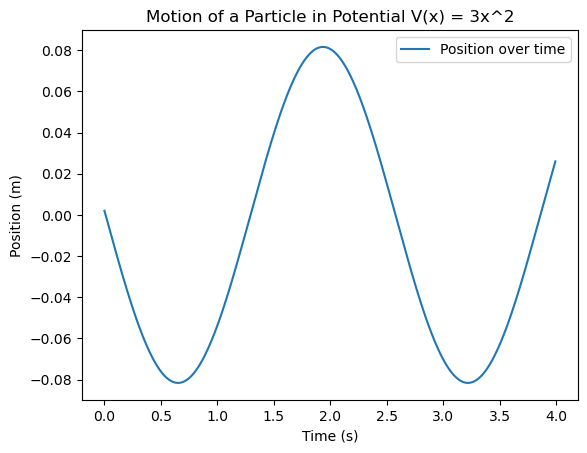

In [12]:
# Import necessary packages
import numpy as np
import matplotlib.pyplot as plt

# Part A: Manual Calculation of Force from Potential

# Given potential function V(x) = 3 * x^2
# To find the force, we use F(x) = -dV/dx

# Manually calculate the derivative:
# V(x) = 3x^2
# dV/dx = 6x
# So, F(x) = -6x

def calculate_force(x):
    return -6 * x

# Display the force for a few sample positions
print("Part A: Calculated force for sample positions")
for position in [-1, 0, 1, 2]:
    print(f"At x = {position}, F(x) = {calculate_force(position)}")



# Part B: Practice with Verlet Integration for Constant Force
def part_b_constant_force():
    mass = 1.0              # Mass of the particle (given)
    delta_t = 0.1           # Time step for Part B
    n_steps = 6             # Number of steps as per the table in Part B
    constant_force = -9.8   # Constant force in Part B

    # Initialize arrays for position
    position = np.zeros(n_steps)  # Array to store positions
    position[0] = 10              # Initial position x_0
    position[1] = 9.951           # Initial position x_1

    # Apply Verlet integration using constant force
    print("\nPart B: Constant Force Verlet Integration")
    print("i\t  x_i  x_{i-1}  x_{i-2}\t  F\t t_i")
    for i in range(2, n_steps):
        position[i] = 2 * position[i - 1] - position[i - 2] + (constant_force / mass) * delta_t**2
        print(f"{i}\t{position[i]:.3f}\t {position[i-1]:.3f}\t {position[i-2]:.3f}\t {constant_force}\t {i * delta_t:.1f}")

# Part C: Full Simulation with Non-Constant Force using Verlet Integration
def part_c_variable_force():
    mass = 1.0              # Mass of the particle
    delta_t = 0.01          # Smaller time step for Part C
    n_steps = 400           # Number of steps for Part C

    # Initialize arrays for position and time
    time = np.linspace(0, delta_t * (n_steps - 1), n_steps)
    position = np.zeros(n_steps)
    position[0] = 0.002      # Initial position x_0
    position[1] = 0          # Initial position x_1 (slightly displaced)

    # Define force function based on Part A calculation
    def force(x):
        return -6 * x

    # Perform Verlet integration with position-dependent force
    for i in range(2, n_steps):
        position[i] = 2 * position[i - 1] - position[i - 2] + (force(position[i - 1]) / mass) * delta_t**2

    # Plot the results
    plt.plot(time, position, label="Position over time")
    plt.xlabel("Time (s)")
    plt.ylabel("Position (m)")
    plt.title("Motion of a Particle in Potential V(x) = 3x^2")
    plt.legend()
    plt.show()

# Run Part A
print("\n--- Part A Completed ---")

# Run Part B
part_b_constant_force()

# Run Part C
part_c_variable_force()


Question 2:
Part A
(q) Using the potential 𝑉(𝑥) = 3𝑥^2, what is the corresponding force? Be sure you get the sign correct, or the later part of this question will not work!

(a) To calculate F(x), force, corresponding to the energy function, V(x) = 3x^2, we need to find the negative derivitive of V(x) with respect to x. First, calculate the force as the negative gradient of the potential: -6x = dV(x)/dx. My sample positions corroborate the derivitive being -6x as demonstrated through the consistent slope decrease of 6 units in the projected points. 

Part B
(q) Let’s do a quick practice run with Verlet integration. Using a constant force 𝐹 = −9.8, a mass 𝑚 = 1.0, and a time step Δ𝑡 = 0.1 complete the following table. Use equation "1" to update the position (𝑥𝑖) at each time step and fill out the table below. Include the completed table in your report. 6pts

(a) Look at output 

Part C
(q) Create a similar table as in part B (or arrays/vectors if you’re using something like Python or R), but this time use the force you determined in part A (which is NOT constant). We have provided the initial conditions below. Compute 𝑥𝑖 and 𝑡𝑖 for about 400 time steps, and then plot 𝑥𝑖 vs 𝑡𝑖 (𝑡𝑖 on the horizontal axis). Use 𝑚 = 1 and Δ𝑡 = 0.01. What kind of motion is the particle undergoing? Include your plot with proper labels. Do not include a table in your report. 10pts

(a) The code porvides oscillatory motion for the particle as it has a quadratic potential, akin to that of harmonic motion. The particle most notably oscillates around x = 0—where oscillations in position are simulated over time.

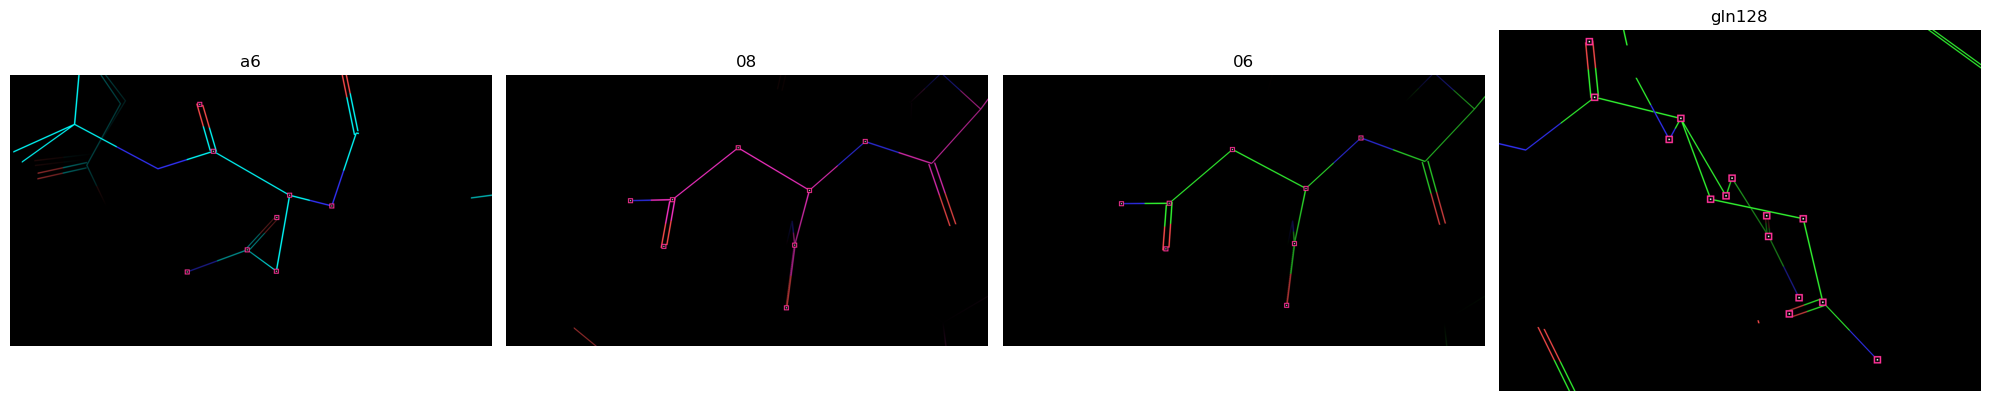

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to your image directory
path = '/Users/tomasmanea/Desktop/Fall2024/QBIO481/A3/'  # adjust if necessary
images = ['a6_structure.png', '08_structure.png', '06_structure.png', 'gln128_a6.png']  # Include gln128_a6.png

# Load and display images
fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # Adjust subplot to 1x4 for four images
for ax, img_path in zip(axes, images):
    img = mpimg.imread(f'{path}{img_path}')
    ax.imshow(img)
    ax.axis('off')  # Hide axes
    ax.set_title(img_path.split('_')[0])  # Set title based on image filename

plt.tight_layout()
plt.show()



Question 3:
Part A
(q) Each of these structures was determined from a different electron density resolution. Based on what you observe of the electron density contours, order the structures for highest (best) resolution to lowest (worst) resolution.

(a) (worst) a6 < 06 < 08 (best)

Part B
(q) You may notice that the density contour on the poorer resolution structures could leave some room for interpretation about the orientation of the ASN side-chain. How might a structural biologist resolve this issue?

(a) If the option to extract higher resolution data doesn't exist, then augmenting the existiing data with electron density refinement, employing PHENIX or other software that can accurately position atoms. Furthermore, there are side-chain rotamer libraries that may serve to predict likely conformations of side chains from software such as PyRosetta and Rosetta. Cross-validation would also serve to resolve dilemnas in side-chain ambiguities. 


Part C
(q)For the a6 structure/electron density, have a look at the residue GLN 128. Zoom in on it and provide a visualization in your report. You will notice that there are two side chains for this residue! What is going on here, and what might be the cause of this?

(a) The two side chains for this residue may be attributed to dynamic flexibility or partial occupancy. The former term denotes that some amino acids—such as glutamine—are flexible and can exist in multiple conformations. The crystal structure, in this instance, captures both positions as the molecule fluctuates between these two configurations. Secondly, there is partial occupancy, where the electron density suggests that GLN 128 occupies each position with partial occupancy, suggesting that at any given time, the residue GLN 128 is in one position or the other.